Import the libraries needed for the analysis. 
While os and re are built-in libraries, basemap, numpy, pygrib, matplotlib and IPython have to be installed first.

In [1]:
import pygrib
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from mpl_toolkits.basemap import shiftgrid
import os
import re

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


As first step, we define the path of the folder where we have stored grib data.

In [2]:
os.chdir("/home/gloria/the-python-space-adventure/pollutants/20180919/uvbed")

Read a grib file:
“z_cams_c_ecmf_20180919000000_prod_fc_sfc_000_uvbed.grib”.

This file contains forecasting data about the biologically effective at 00:00, Greenwich time, for the 19th of September 2018.

In [3]:
grib='z_cams_c_ecmf_20180919000000_prod_fc_sfc_000_uvbed.grib' # Set the file name of your input GRIB file
grbs=pygrib.open(grib)

For calculating the UV index divide the biologically effective dose by 0.025. 

In [4]:
scalar = 0.025
grb = grbs.select()[0]
data=grb.values
data2= data / scalar

Use shiftgrid to plot grib file correctly

In [5]:
lons = np.linspace(float(grb['longitudeOfFirstGridPointInDegrees']), \
float(grb['longitudeOfLastGridPointInDegrees']), int(grb['Ni']) )
lats = np.linspace(float(grb['latitudeOfFirstGridPointInDegrees']), \
float(grb['latitudeOfLastGridPointInDegrees']), int(grb['Nj']) )
data2, lons = shiftgrid(180., data2, lons, start=False)

Define the projection system and the bounding box of our map using “Basemap” library by select the Cylindrical Equidistant Projection ‘cyl’ and including the coastline, meridians and parallels as shown below:

In [6]:

m=Basemap(projection='cyl', llcrnrlon=-180, \
  urcrnrlon=180.,llcrnrlat=lats.min(),urcrnrlat=lats.max(), \
  resolution='c')



For plotting the data on the map created, we need to create a coordinate matriz with values of latitude and longitude with the function meshgrid and plot it on the map. Each pixel has the spatial resolution of 0,4 degree. 

In [7]:
grid_lon, grid_lat = np.meshgrid(lons, lats) #regularly spaced 2D grid
x, y = m(grid_lon, grid_lat)

Set the scale and palette color ramp of the map together with the legend, and plotting the grib. 

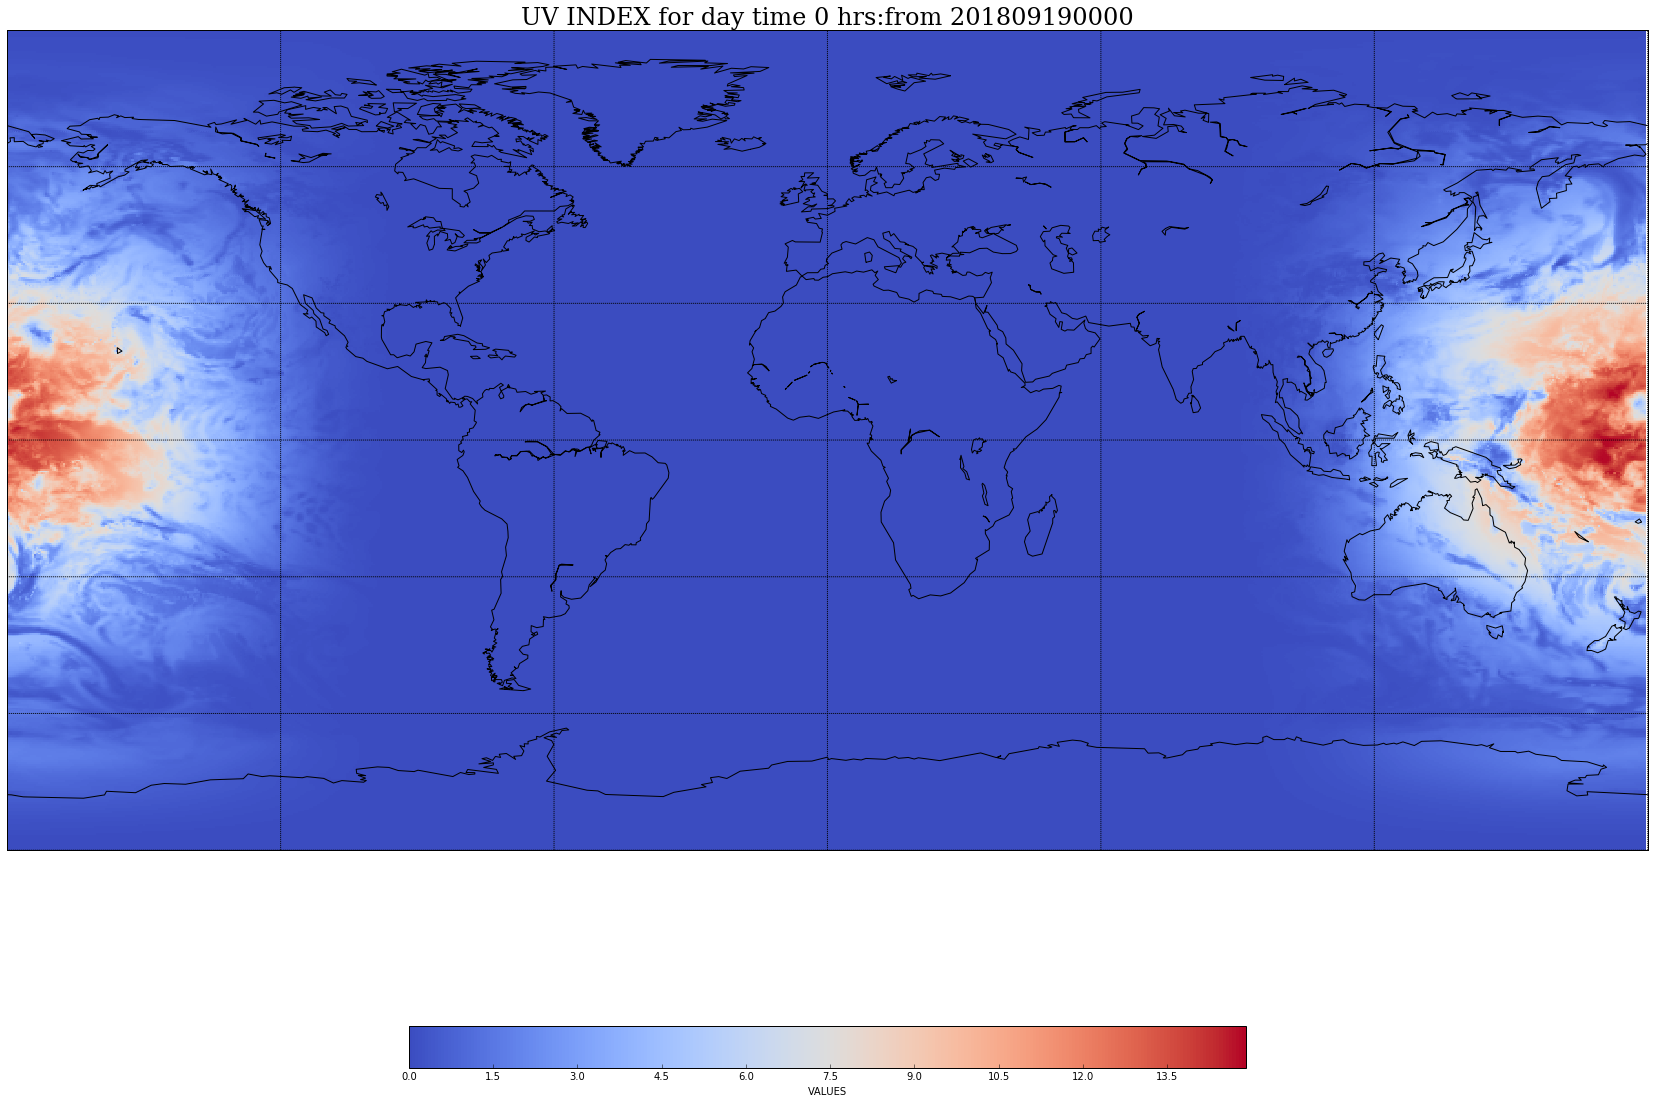

In [8]:
plt.figure(figsize=(30,21))
m.drawcoastlines()
m.drawmapboundary()
m.drawmeridians(np.arange(-180.,180.,60.))
m.drawparallels(np.arange(-90, 90, 30))

cmap = plt.get_cmap('coolwarm')
cs = m.pcolormesh(x,y,data2,shading='flat',cmap=cmap)
plt.colorbar(cs,orientation='horizontal', shrink=0.5, label = "VALUES")

time = re.findall('(time [a-z0-9: ]*)', str(grb))
title = "UV INDEX for day " + time[0]
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 24,
        }

plt.title(title, fontdict = font)


plt.show()

we can now use the code below to read all the grib files present in our folder, make  calculations, plot the data into an animation and save the results in  GIF format under the same directory. At the end of this process you should be able to see the output file called “animation_UV.gif”.

<IPython.core.display.Javascript object>


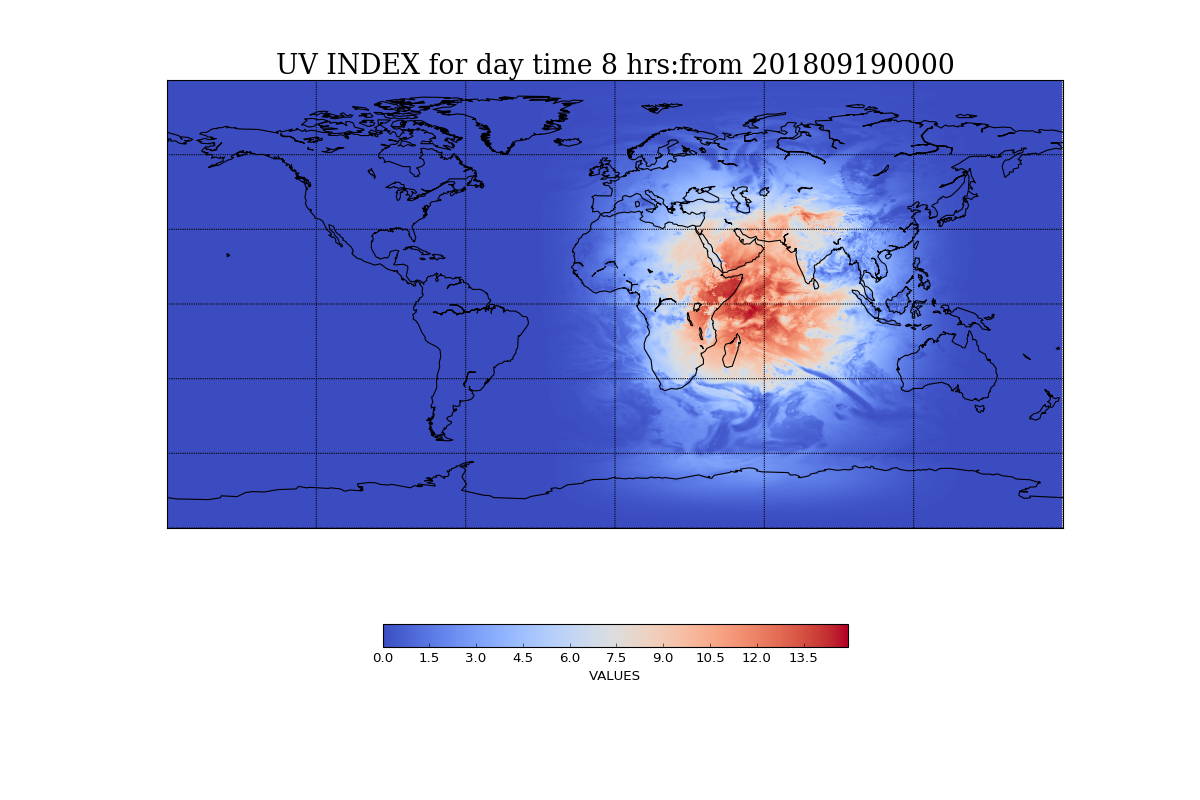

In [9]:
%matplotlib notebook

plt.figure(figsize=(15,10))
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

griblist = os.listdir("/home/gloria/the-python-space-adventure/pollutants/20180919/uvbed")
levelist = []
for grb in sorted(griblist, key=numericalSort):
    grbs=pygrib.open(grb)
    for grb in grbs: levelist.append(grb)

        
grib='z_cams_c_ecmf_20180919000000_prod_fc_sfc_000_uvbed.grib' # Set the file name of your input GRIB file
grbs=pygrib.open(grib)
for grb in grbs: grb
    
grb = grbs.select()[0]
data=grb.values
scalar = 0.025
data2= data / scalar    
    

lons = np.linspace(float(grb['longitudeOfFirstGridPointInDegrees']), \
float(grb['longitudeOfLastGridPointInDegrees']), int(grb['Ni']) )
lats = np.linspace(float(grb['latitudeOfFirstGridPointInDegrees']), \
float(grb['latitudeOfLastGridPointInDegrees']), int(grb['Nj']) )
data2, lons = shiftgrid(180., data2, lons, start=False)    
    
m = Basemap(projection='cyl', llcrnrlon=-180, \
    urcrnrlon=180.,llcrnrlat=lats.min(),urcrnrlat=lats.max(), \
    resolution='c')

m.drawcoastlines()
m.drawmapboundary()
m.drawmeridians(np.arange(-180.,180.,60.))
m.drawparallels(np.arange(-90, 90, 30))

grid_lon, grid_lat = np.meshgrid(lons, lats) #regularly spaced 2D grid
x, y = m(grid_lon, grid_lat)

cmap = plt.get_cmap('coolwarm')
cs = m.pcolormesh(x,y,data2,shading='flat',cmap=cmap)
plt.colorbar(cs,orientation='horizontal', shrink=0.5, label = "VALUES")

def animate (i):
    grb = levelist[i]
    lons = np.linspace(float(grb['longitudeOfFirstGridPointInDegrees']), \
    float(grb['longitudeOfLastGridPointInDegrees']), int(grb['Ni']) )
    lats = np.linspace(float(grb['latitudeOfFirstGridPointInDegrees']), \
    float(grb['latitudeOfLastGridPointInDegrees']), int(grb['Nj']) )
    
    data = grb.values/ 0.025
    data, lons = shiftgrid(180., data, lons, start=False)
    grid_lon, grid_lat = np.meshgrid(lons, lats) #regularly spaced 2D grid
    x, y = m(grid_lon, grid_lat)
    cmap = plt.get_cmap('coolwarm')
    cs = m.pcolormesh(x,y,data,shading='flat',cmap=cmap)
    time = re.findall('(time [0-9]*)', str(grb))
    time2 = re.findall('(time [a-z0-9: ]*)', str(grb))
    title = "UV INDEX for day " + time2[0]
    plt.title(title, fontdict = font)

anim = animation.FuncAnimation(plt.gcf(), animate,
                               frames=len(levelist), interval=250)

anim.save('animation_UV.gif', writer='imagemagick')


plt.show()




![](Copernicus_UV_data/data/animation_UV.gif )

In [1]:
from IPython.display import Image
Image(url='pollutants/20180919/uvbed/animation_UV.gif')

![](https://github.com/Randbee/Copernicus_UV_data/blob/master/data/animation_UV.gif)

![](https://github.com/Randbee/Copernicus_UV_data/blob/master/data/animation_UV.gif)